In [1]:
import sys
sys.path.append('../xgboost/python-package')

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.utils import class_weight
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score ,precision_score
from sklearn.model_selection import StratifiedShuffleSplit



import pickle
import torch
torch.cuda.is_available()
device = torch.device('cuda')

from aux_xgb_functions import BRF_crossval, recall_mod_v1, LabelEncoder

In [2]:
Labels_dict={'Hierarchical':['Transient','Stochastic', 'Periodic'],
            'Periodic':['E','RRL','LPV','Periodic-Other','DSCT','CEP'],
            'Stochastic':['QSO','AGN', 'YSO','Blazar', 'CV/Nova'],
            'Transient':['SNIa','SNII','SNIbc','SLSN'],
            'Complete':['SNIa','SNII','SNIbc','SLSN','QSO','AGN', 'YSO','Blazar', 'CV/Nova','E','RRL','LPV','Periodic-Other','DSCT','CEP']
           }


In [3]:
df1 = pd.read_csv(r"/home/vicente/Jupyter_notebooks/features_LCC.csv")
df2 = pd.read_csv(r"/home/vicente/Jupyter_notebooks/labels_LCC.csv")

X = df1.drop(['oid'],axis=1).copy()
y_o = df2['class_original'].copy()
y_h = df2['class_hierarchical'].copy()

item_counts = y_h.value_counts(normalize=False)
print(item_counts)
item_counts = y_o.value_counts(normalize=False)
print(item_counts)

Periodic      87065
Stochastic    34713
Transient      1718
Name: class_hierarchical, dtype: int64
E                 37901
RRL               32482
QSO               26168
LPV               14076
AGN                4667
YSO                1740
SNIa               1272
Blazar             1267
Periodic-Other     1256
CV/Nova             871
DSCT                732
CEP                 618
SNII                328
SNIbc                94
SLSN                 24
Name: class_original, dtype: int64


Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.74  Std = 0.01
Recall: Mean = 0.86  Std = 0.00
F1-score: Mean = 0.79  Std = 0.00
Mod. Recall: Mean = 0.86  Std = 0.01
Min. Recall: Mean = 0.66  Std = 0.02


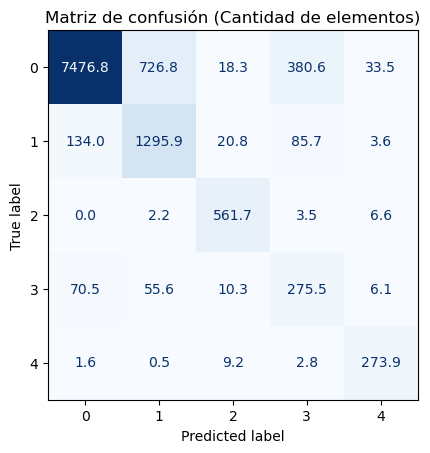

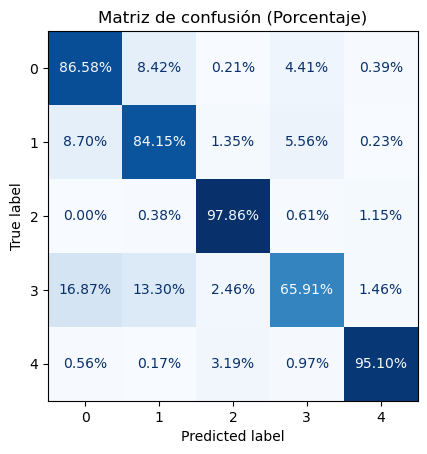

In [4]:
subclass= 'Stochastic'
X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
BRF_crossval(X_sc,y_sc)

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.56  Std = 0.00
Recall: Mean = 0.82  Std = 0.01
F1-score: Mean = 0.58  Std = 0.00
Mod. Recall: Mean = 0.79  Std = 0.01
Min. Recall: Mean = 0.71  Std = 0.01


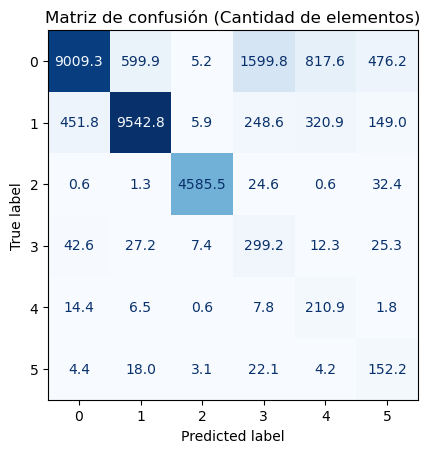

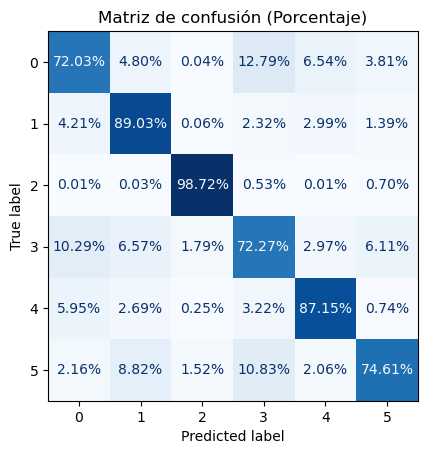

In [5]:
subclass= 'Periodic'
X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
BRF_crossval(X_sc,y_sc)

Validation 1/10
Validation 2/10
Validation 3/10
Validation 4/10
Validation 5/10
Validation 6/10
Validation 7/10
Validation 8/10
Validation 9/10
Validation 10/10
Precision: Mean = 0.45  Std = 0.03
Recall: Mean = 0.58  Std = 0.05
F1-score: Mean = 0.43  Std = 0.04
Mod. Recall: Mean = 0.67  Std = 0.09
Min. Recall: Mean = 0.35  Std = 0.09


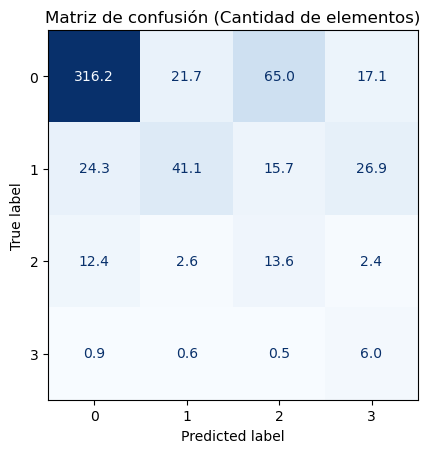

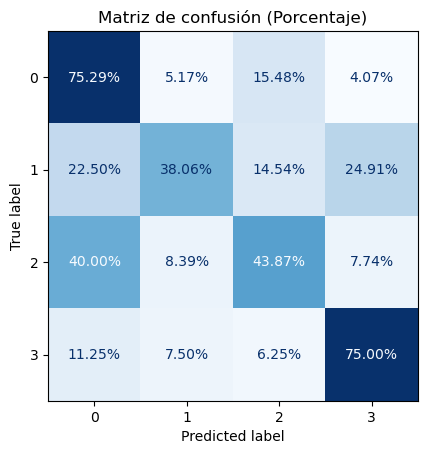

In [6]:
subclass= 'Transient'
X_sc = X.loc[y_h==subclass,:]
y_sc = y_o.loc[y_h==subclass]
BRF_crossval(X_sc,y_sc)